### load the dataset

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [171]:
train = pd.read_csv('bike_demand.csv')

In [172]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [173]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [174]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


In [175]:
train.isnull().sum().sum() # there is no missing data, that's great

0

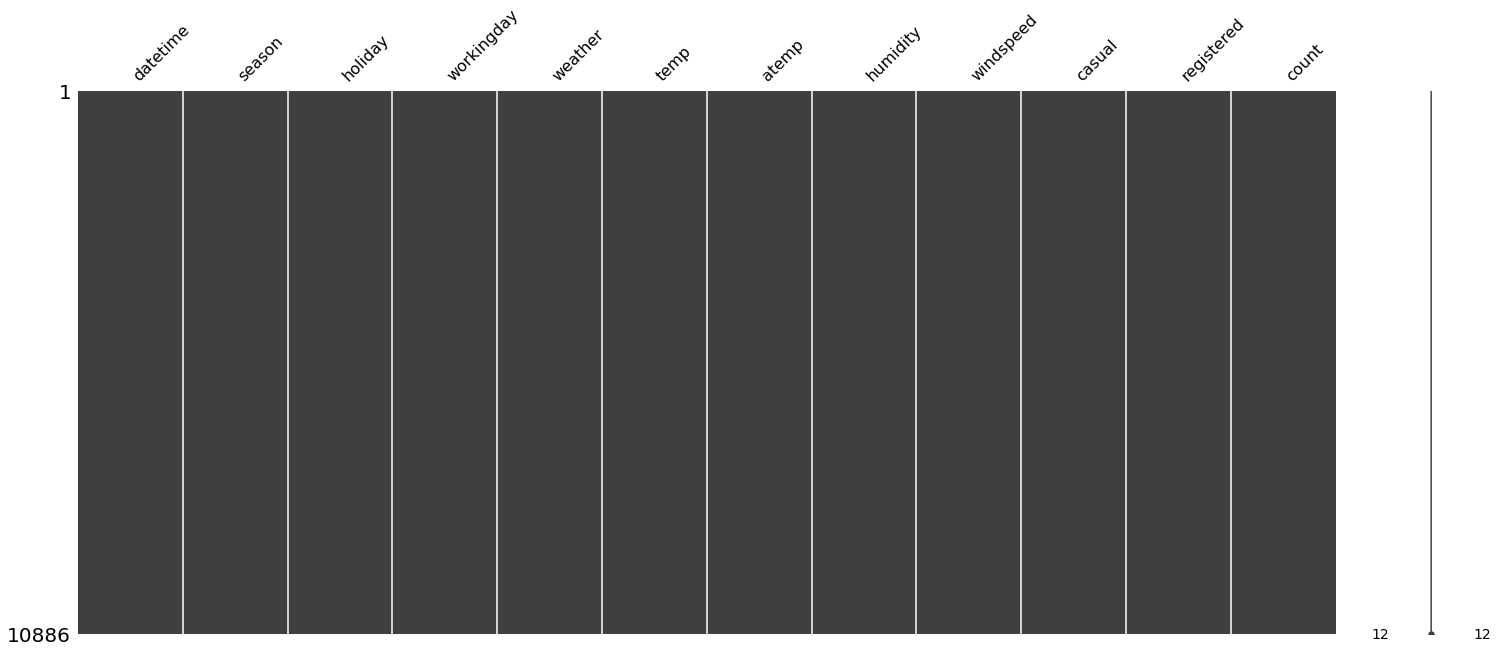

In [176]:
# visulize missing data, we dont have any 
msno.matrix(train); 

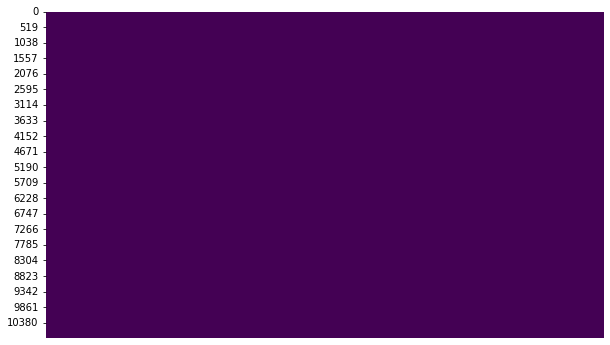

In [177]:
sns.heatmap(train.isnull(), cmap='viridis', xticklabels=[], cbar=False)
fig = plt.gcf()
fig.set_size_inches(10,6) # we can also visulaize the missing data in thiw way, clearly we dont have any

### EDA

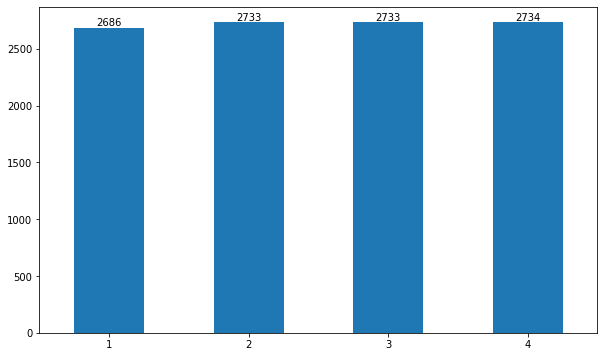

In [178]:
train['season'].value_counts().sort_values().plot.bar(figsize=(10,6))
plt.xticks(rotation=360)
ax = plt.gca()
for i in ax.containers:
    plt.bar_label(i)

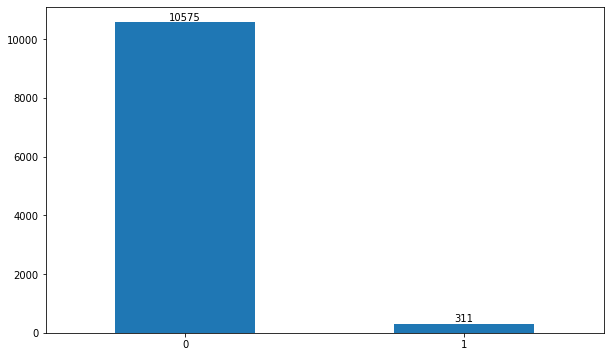

In [179]:
train['holiday'].value_counts().plot.bar(figsize=(10,6))
plt.xticks(rotation=360)
ax = plt.gca()
for i in ax.containers:
    plt.bar_label(i)

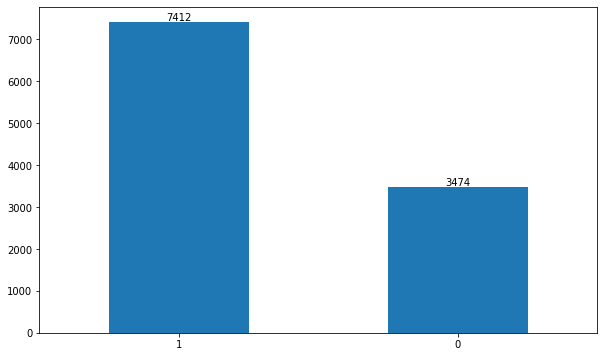

In [180]:
train['workingday'].value_counts().plot.bar(figsize=(10,6))
plt.xticks(rotation=360)
ax = plt.gca()
for i in ax.containers:
    plt.bar_label(i)

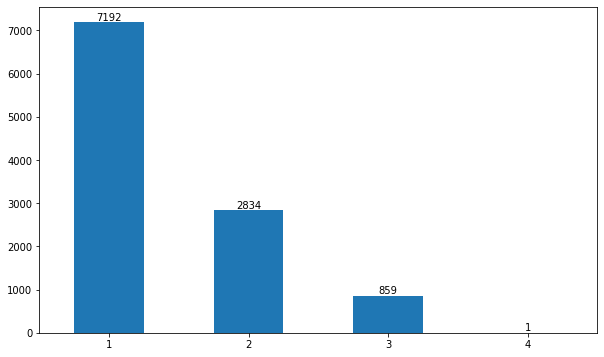

In [181]:
train['weather'].value_counts().plot.bar(figsize=(10,6))
plt.xticks(rotation=360)
ax = plt.gca()
for i in ax.containers:
    plt.bar_label(i)

### feature engineering

In [182]:
from datetime import datetime

In [183]:
import calendar

In [184]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [185]:
train['date'] = train['datetime'].apply(lambda x: x.date())

In [186]:
train['hour'] = train['datetime'].apply(lambda x: x.hour)

In [187]:
train['weekday'] = train['datetime'].apply(lambda x: calendar.day_name[x.weekday()])

In [188]:
train['month'] = train['datetime'].apply(lambda x: calendar.month_name[x.month])

In [189]:
# this is another way to do this

#train["date"] = train.datetime.apply(lambda x : x.split()[0])
#train["hour"] = train.datetime.apply(lambda x : x.split()[1].split(":")[0])
#train["weekday"] = train.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
#train["month"] = train.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])

In [190]:
train["season"] = train.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
train["weather"] = train.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", 
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })

In [191]:
train.drop('datetime', axis=1, inplace=True)

In [231]:
categorical_columns = ['season', 'holiday', 'workingday', 'weather', 'date','hour', 'weekday', 'month']
for column in categorical_columns:
    train[column] = train[column].astype('category')

In [194]:
train.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month
0,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,81,0.0,3,13,16,2011-01-01,0,Saturday,January
1,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,8,32,40,2011-01-01,1,Saturday,January


### data type visulization

In [211]:
df = pd.DataFrame(train.dtypes.value_counts()).reset_index().rename(columns={'index':'vartype', 0:'count'})

In [236]:
df['vartype']= df['vartype'].astype(str)

In [245]:
df = df.groupby('vartype').sum().reset_index()

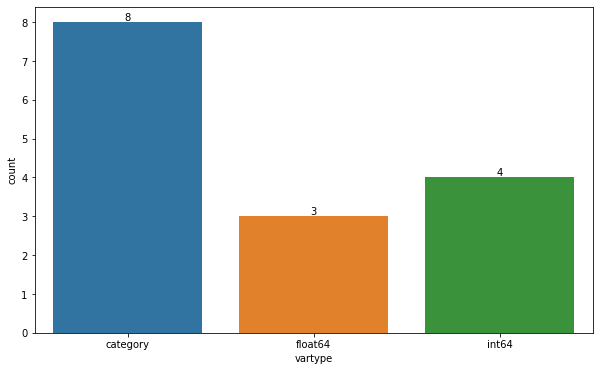

In [249]:
sns.barplot(data=df, x='vartype', y='count')
fig = plt.gcf()
fig.set_size_inches(10,6)
ax = plt.gca()
for i in ax.containers:
    plt.bar_label(i)

In [261]:
train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'date',
       'hour', 'weekday', 'month'],
      dtype='object')

In [283]:
train['weather'].unique()

[' Clear + Few clouds + Partly cloudy + Partly ..., ' Mist + Cloudy, Mist + Broken clouds, Mist + ..., ' Light Snow, Light Rain + Thunderstorm + Scat..., ' Heavy Rain + Ice Pallets + Thunderstorm + Mi...]
Categories (4, object): [' Clear + Few clouds + Partly cloudy + Partly ..., ' Heavy Rain + Ice Pallets + Thunderstorm + Mi..., ' Light Snow, Light Rain + Thunderstorm + Scat..., ' Mist + Cloudy, Mist + Broken clouds, Mist + ...]

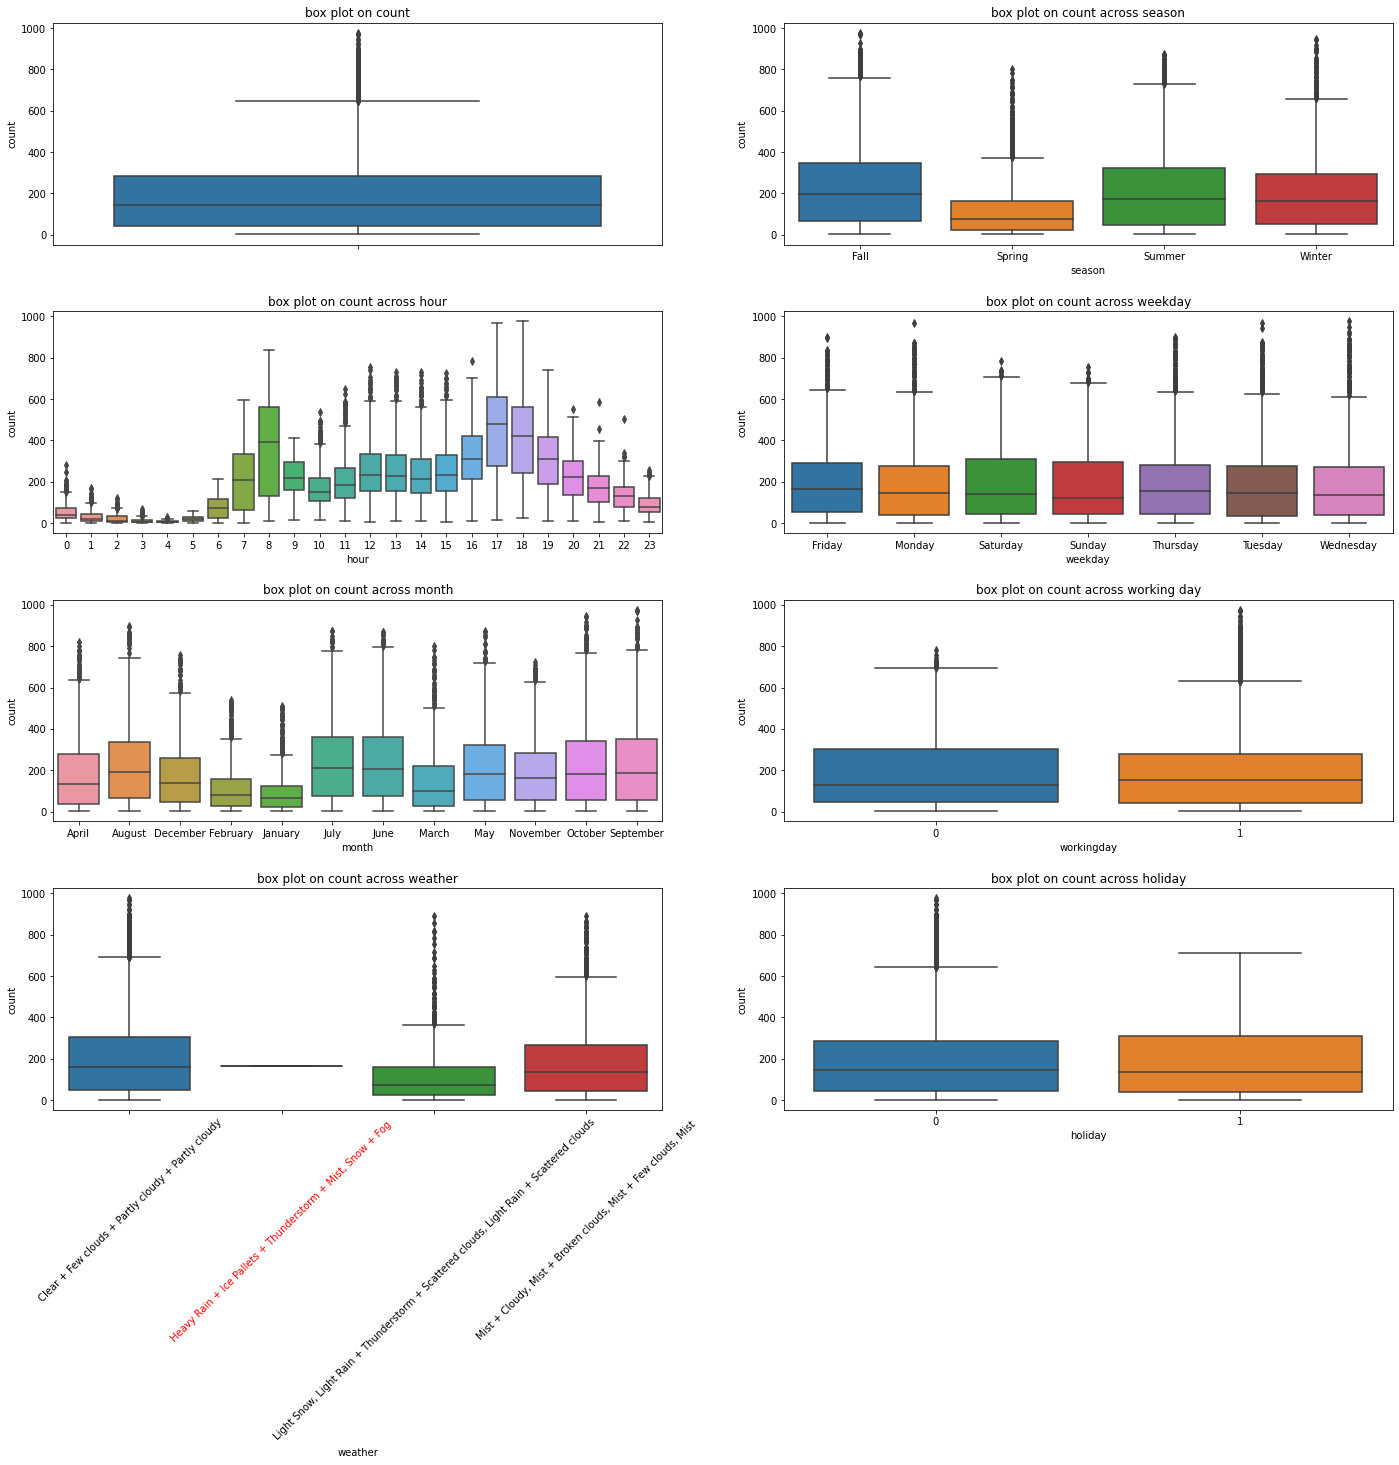

In [318]:
fig, axes = plt.subplots(4,2,figsize=(24,20), gridspec_kw=dict(hspace=0.3))
sns.boxplot(data=train, y='count', ax=axes[0,0])
sns.boxplot(data=train, x='season', y='count', ax=axes[0,1])
sns.boxplot(data=train, x= 'hour', y='count', ax=axes[1,0])
sns.boxplot(data=train, x='weekday', y='count', ax=axes[1,1])
sns.boxplot(data=train, x='month', y='count', ax=axes[2,0])
sns.boxplot(data=train, x='workingday', y='count', ax=axes[2,1])
sns.boxplot(data=train, x='holiday', y='count', ax=axes[3,1])
sns.boxplot(data=train, x='weather', y='count', ax=axes[3,0])
for i in axes[3,0].get_xticklabels():
    i.set_rotation(45)
axes[3,0].get_xticklabels()[1].set_color('r')



axes[0,0].set_title('box plot on count')
axes[0,1].set_title('box plot on count across season')
axes[1,0].set_title('box plot on count across hour')
axes[1,1].set_title('box plot on count across weekday')
axes[2,0].set_title('box plot on count across month')
axes[2,1].set_title('box plot on count across working day')
axes[3,1].set_title('box plot on count across holiday')
axes[3,0].set_title('box plot on count across weather');

### remove outliers 

In [320]:
train = train[np.abs(train["count"]-train["count"].mean())<=(3*train["count"].std())] 

In [321]:
train.shape

(10739, 15)

### correlation analysis

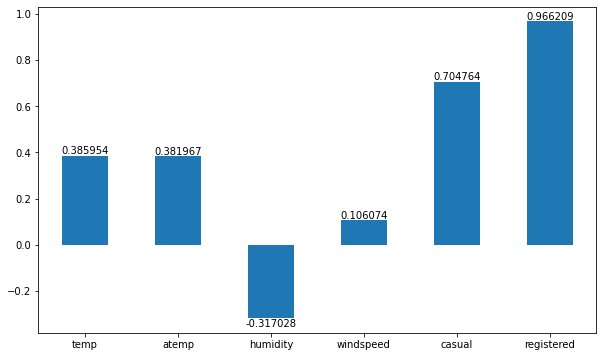

In [341]:
train.corr()['count'][:-1].plot.bar(figsize=(10,6));
ax = plt.gca()
for i in ax.containers:
    plt.bar_label(i)
plt.xticks(rotation=360); # the registered column is mostly correlated with the count column

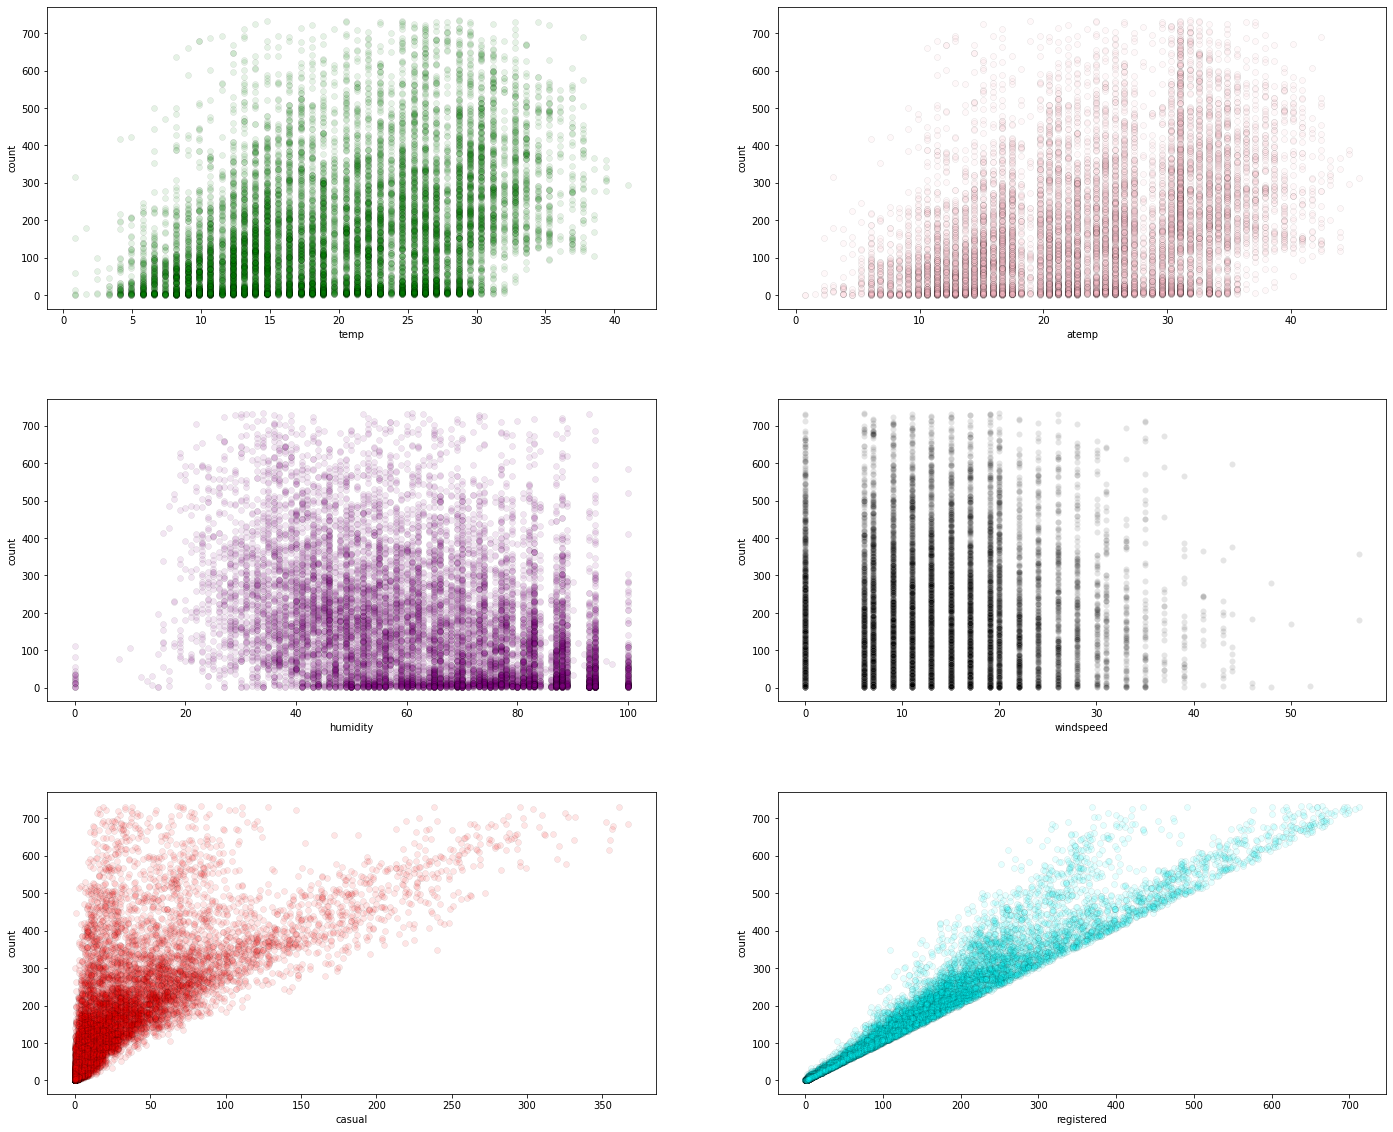

In [388]:
fig, axes = plt.subplots(3,2,figsize=(24,20), gridspec_kw=dict(hspace=0.3))

sns.scatterplot(train, x='temp', y='count', ax=axes[0,0], color='g', alpha=0.1, edgecolor='black')
sns.scatterplot(data=train, x='atemp', y='count', ax=axes[0,1],color='pink',alpha=0.1,edgecolor='black')

sns.scatterplot(data=train, x= 'humidity', y='count', ax=axes[1,0], color='purple',alpha=0.1, edgecolor='black')
sns.scatterplot(data=train, x='windspeed', y='count', ax=axes[1,1], color='black',alpha=0.1)

sns.scatterplot(data=train, x='casual', y='count', ax=axes[2,0], color='red',alpha=0.1,edgecolor='black')
sns.scatterplot(data=train, x='registered', y='count', ax=axes[2,1],color= 'cyan',alpha=0.1,edgecolor='black');

### distribution of count

In [391]:
from scipy import stats

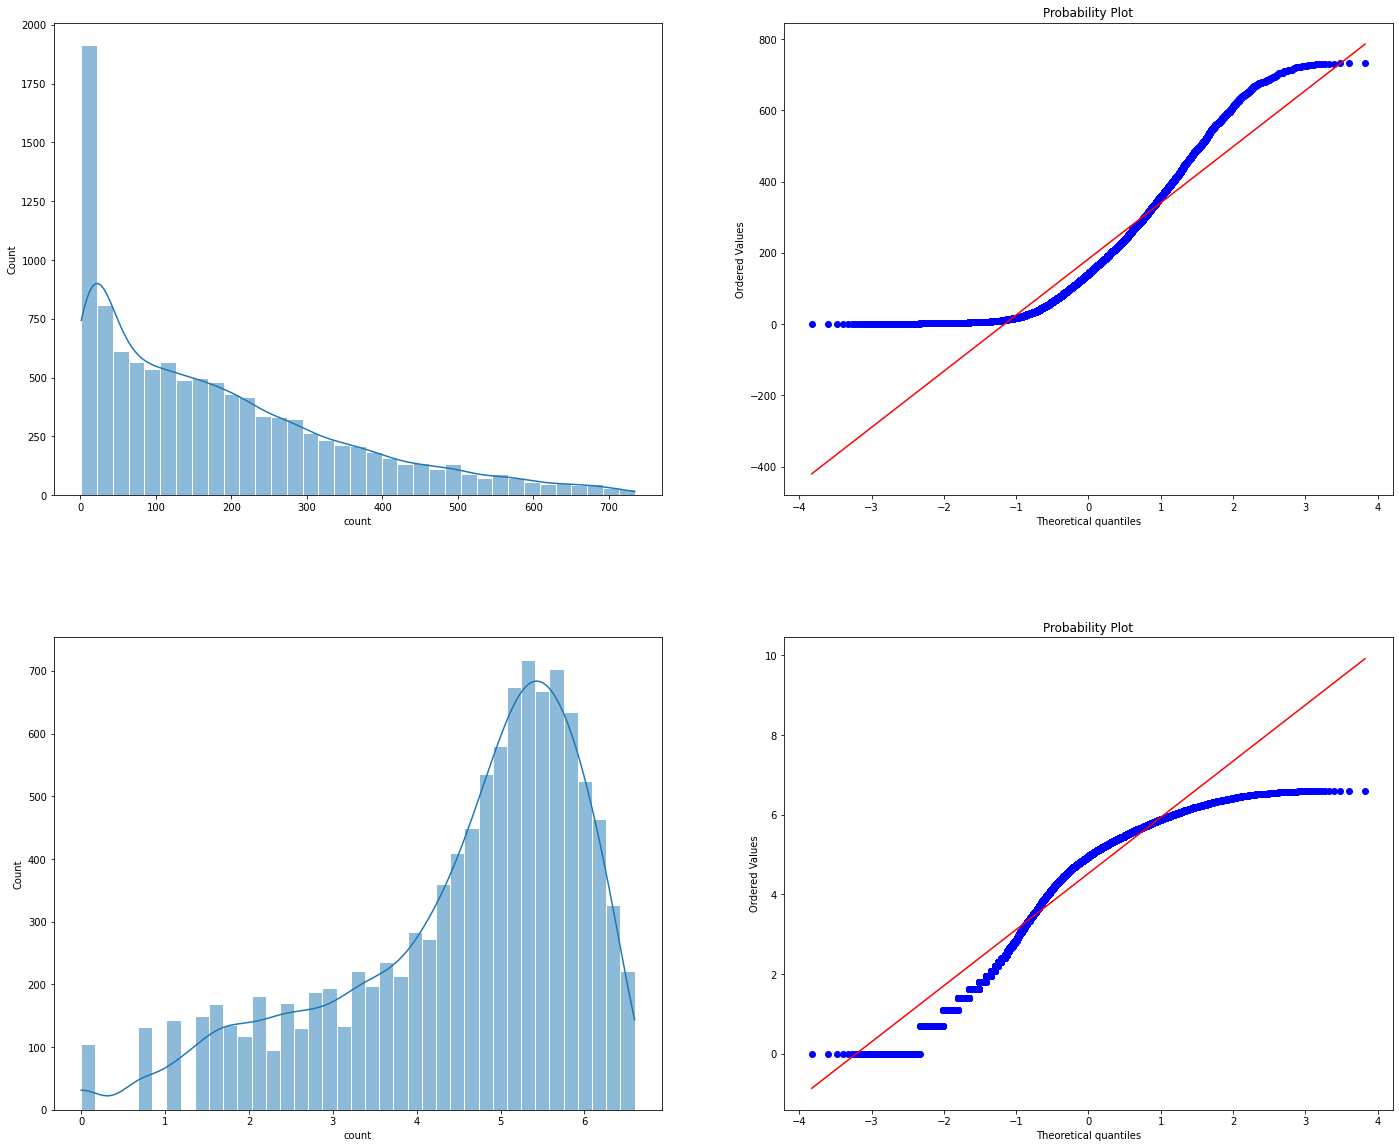

In [410]:
fig, axes = plt.subplots(2,2,figsize=(24,20), gridspec_kw=dict(hspace=0.3))
sns.histplot(train['count'], ax=axes[0,0], kde=True, edgecolor='white')
sns.histplot(np.log(train['count']), ax=axes[1,0], kde=True, edgecolor='white')

stats.probplot(train["count"], dist='norm', fit=True, plot=axes[0][1])
stats.probplot(np.log(train["count"]), dist='norm', fit=True, plot=axes[1][1]);

### Count vs. categorical variables 

In [474]:
train.select_dtypes(exclude=np.number).columns # all the non-numeric columns

Index(['season', 'holiday', 'workingday', 'weather', 'date', 'hour', 'weekday',
       'month'],
      dtype='object')

Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across Weekday')

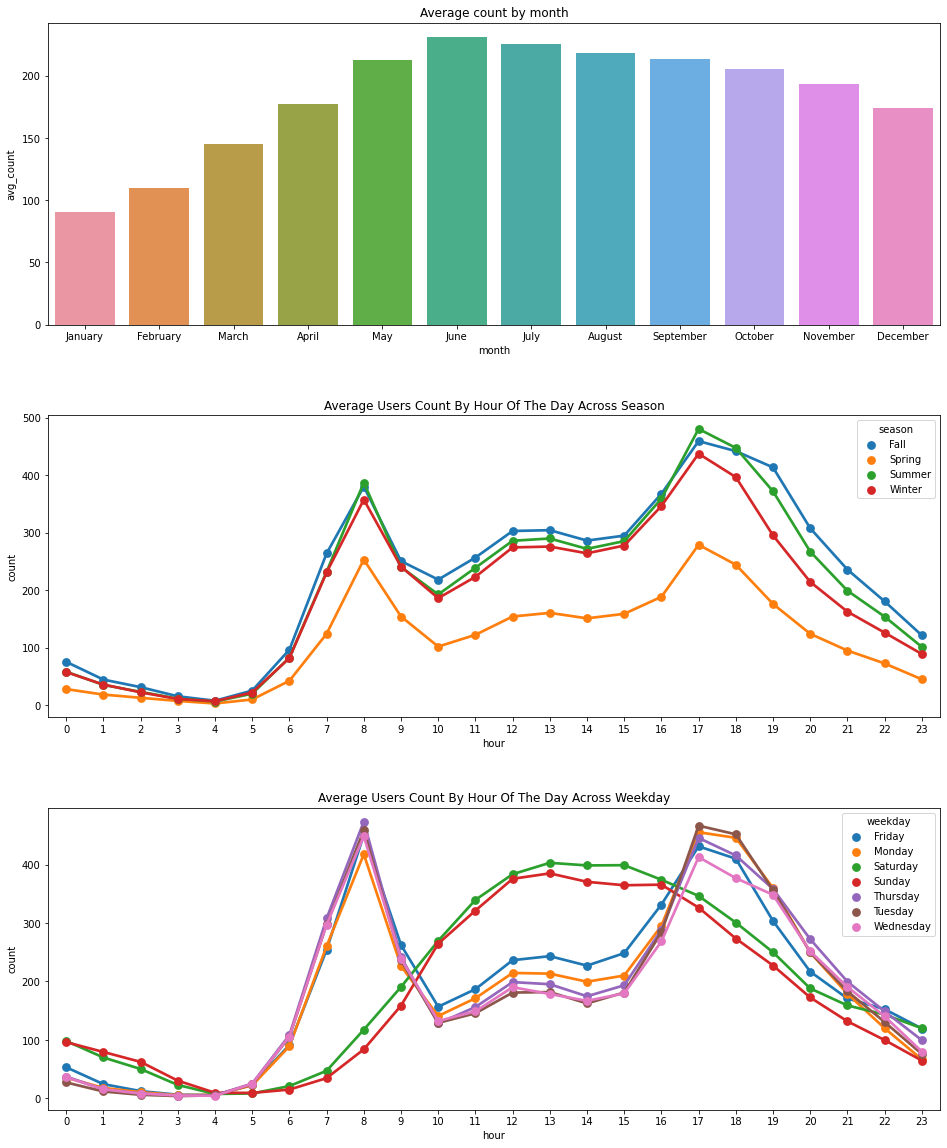

In [471]:
fig,(ax1,ax2,ax3)= plt.subplots(nrows=3, figsize=(16, 20), gridspec_kw=dict(hspace=0.3))
df = train.groupby('month')['count'].mean().reset_index().sort_values(by='count')
sns.barplot(data=df, x='month', y='count',order=train['month'].unique(), ax=ax1)
ax1.set_ylabel('avg_count')
ax1.set_title('Average count by month')


df1=train.groupby(['hour', 'season'])['count'].mean().reset_index()
sns.pointplot(data=df1, x='hour', y='count', hue='season', ax=ax2)
ax2.set_title('Average Users Count By Hour Of The Day Across Season')

df2=train.groupby(['hour', 'weekday'])['count'].mean().reset_index()
sns.pointplot(data=df2, x='hour', y='count', hue='weekday', ax=ax3)
ax3.set_title('Average Users Count By Hour Of The Day Across Weekday')